In [6]:
import numpy as np
import matplotlib.pyplot as plt
import unyt
import swiftsimio as sw
import h5py
from scipy.spatial.transform import Rotation as Ro
from pathlib import Path
from PIL import Image
#xray_lum offset>0.2:2.,  13.,  21.,  50.,  64.,  66.,  82., 105
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles_recenter/"


f=h5py.File(path+'32.hdf5','r')

Coord_g=np.array(f['PartType0']["Coordinates"])
Coord_s=np.array(f['PartType2']["Coordinates"])
Coord_dm=f['PartType1']["Coordinates"]
star_lum=np.array(f['PartType2']['lum_gamaz'])
xyz_dm=np.array(Coord_dm).T 
xyz_s=np.array(Coord_s).T
xyz_g=np.array(Coord_g).T

p=np.array(f['PartType1']['potentials'])
xray_lum=np.array(f['PartType0']['xray_lum_erosita_low'])+np.array(f['PartType0']['xray_lum_erosita_high'])
pg=np.array(f['PartType0']['potentials'])
ps=np.array(f['PartType2']['potentials'])
#xray_lum=np.array(f['PartType1']['xray_lum_rosat'])
#T=np.array(f['PartType1']['temperatures'])
f.close()
x_dm=xyz_dm[0]
r=np.max(x_dm)
r_dm=np.sqrt(xyz_dm[0]**2+xyz_dm[1]**2+xyz_dm[2]**2)/r
x_g=xyz_g[0]/r
y_g=xyz_g[1]/r
z_g=xyz_g[2]/r
r_g=np.sqrt(x_g**2+y_g**2+z_g**2)
r_s=np.sqrt(xyz_s[0]**2+xyz_s[1]**2+xyz_s[2]**2)/r
Coord_s=Coord_s/r
'''
f=h5py.File(path+'2gas.hdf5','r')
a_agn=np.array(f['PartType0']['a_last_agn'])
a_max_t=np.array(f['PartType0']['a_max_t'])
id=np.array(f['PartType0']['gas_id'])
f.close()
x_g=xyz_g[0]/r
y_g=xyz_g[1]/r
z_g=xyz_g[2]/r
r_g=np.sqrt(x_g**2+y_g**2+z_g**2)
f=h5py.File(path+'2test.hdf5','r')
p=np.array(f['PartType0']['dm_potentials'])

f.close()



f=h5py.File(path+'80stars.hdf5','r')
xyz=np.array(f['PartType0']["Coordinates"])
xyz_star=np.array(xyz).T
star_lum=np.array(f['PartType0']['lum_gamaz'])
star_potential=np.array(f['PartType0']['star_potentials'])
x_star=xyz_star[0]
x_star=x_star/r
y_star=xyz_star[1]
y_star=y_star/r
z_star=xyz_star[2]
z_star=z_star/r
r_star=np.sqrt(x_star**2+y_star**2+z_star**2)
f.close()


xm=x_g[xray_lum==np.max(xray_lum)][0]
ym=y_g[xray_lum==np.max(xray_lum)][0]
zm=z_g[xray_lum==np.max(xray_lum)][0]
#axis=np.array([ 0.7208, 0.9334, 0.9379 ])
axis=np.array([ 0,0,0])
rotation = Ro.from_rotvec(-axis)

rotated_points = rotation.apply(Coord_g)/r
xlum_m=rotation.apply(np.array([xm,ym,zm]))
folder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/66_kde0/"
imgg = Image.open(folder+" 0.7208, 0.9334, 0.9379 .png")#.convert("L")
img_array = np.array(imgg)

pixel_x=len(img_array[0])
pixel_y=len(img_array[:,0])
max_position = np.unravel_index(np.argmax(img_array), img_array.shape)
    
x=(max_position[1]/pixel_y-0.5)*2
y=((1-max_position[0]/pixel_x)-0.5)*2
print(x,y,xlum_m[0],xlum_m[1],xlum_m[2])
'''

'\nf=h5py.File(path+\'2gas.hdf5\',\'r\')\na_agn=np.array(f[\'PartType0\'][\'a_last_agn\'])\na_max_t=np.array(f[\'PartType0\'][\'a_max_t\'])\nid=np.array(f[\'PartType0\'][\'gas_id\'])\nf.close()\nx_g=xyz_g[0]/r\ny_g=xyz_g[1]/r\nz_g=xyz_g[2]/r\nr_g=np.sqrt(x_g**2+y_g**2+z_g**2)\nf=h5py.File(path+\'2test.hdf5\',\'r\')\np=np.array(f[\'PartType0\'][\'dm_potentials\'])\n\nf.close()\n\n\n\nf=h5py.File(path+\'80stars.hdf5\',\'r\')\nxyz=np.array(f[\'PartType0\']["Coordinates"])\nxyz_star=np.array(xyz).T\nstar_lum=np.array(f[\'PartType0\'][\'lum_gamaz\'])\nstar_potential=np.array(f[\'PartType0\'][\'star_potentials\'])\nx_star=xyz_star[0]\nx_star=x_star/r\ny_star=xyz_star[1]\ny_star=y_star/r\nz_star=xyz_star[2]\nz_star=z_star/r\nr_star=np.sqrt(x_star**2+y_star**2+z_star**2)\nf.close()\n\n\nxm=x_g[xray_lum==np.max(xray_lum)][0]\nym=y_g[xray_lum==np.max(xray_lum)][0]\nzm=z_g[xray_lum==np.max(xray_lum)][0]\n#axis=np.array([ 0.7208, 0.9334, 0.9379 ])\naxis=np.array([ 0,0,0])\nrotation = Ro.from_rotve

Text(0, 0.5, 'Lum_z')

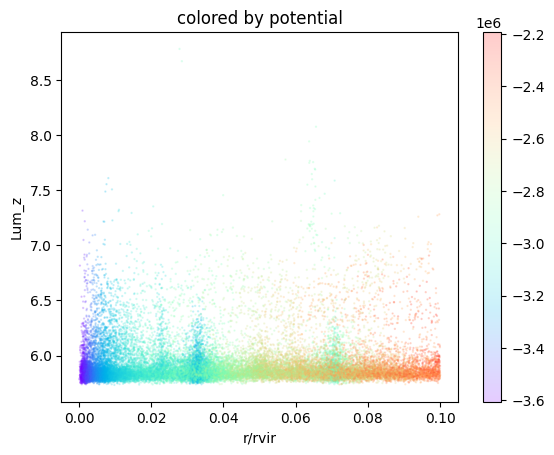

In [7]:

import matplotlib.pyplot as plt
from matplotlib import colors
title="M>1e14"
boxused="/Flamingo/L0200N0720/"
#  x=np.append(x_dm[i],x_g[i])
#  y=np.append(y_dm[i],y_g[i])
fig = plt.figure()
ax=plt.subplot(1,1,1)
mask=(r_s<0.1)
sc=ax.scatter(r_s[mask],np.log10(star_lum[mask]),s=0.5,alpha=0.2,c=ps[mask],cmap='rainbow')
#sc=ax.scatter(r_s[mask],ps[mask],s=0.2,alpha=0.2,cmap='rainbow',c=np.log10(star_lum[mask]))

#ax.scatter(r_dm[r_dm<0.1],p[r_dm<0.1],s=0.5,alpha=0.1)
#ax.scatter(xyz_dm[0][r_dm<0.03],xyz_dm[1][r_dm<0.03],s=0.1,alpha=0.5)
#print(r_dm[p==np.min(p)])
plt.colorbar(sc)
#ax.plot(np.sqrt(x**2+y**2),np.log10(0.1),marker='o')
ax.set_xlabel("r/rvir")
ax.set_title("colored by potential")
ax.set_ylabel("Lum_z")

In [ ]:
##star_lum=star_lum[mask
x_s=xyz_s[0][mask]/r
y_s=xyz_s[1][mask]/r
z_s=xyz_s[2][mask]/r

h=np.histogramdd(Coord_s[r_s<0.04],bins=100,range=[[-0.1,0.1],[-0.1,0.1],[-0.1,0.1]],weights=star_lum[r_s<0.1])

#plt.imshow(np.log10(h[0]))

/tmp/ipykernel_1547895/1996118209.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(ra,np.log10(density),color='r',s=0.1,alpha=0.5)


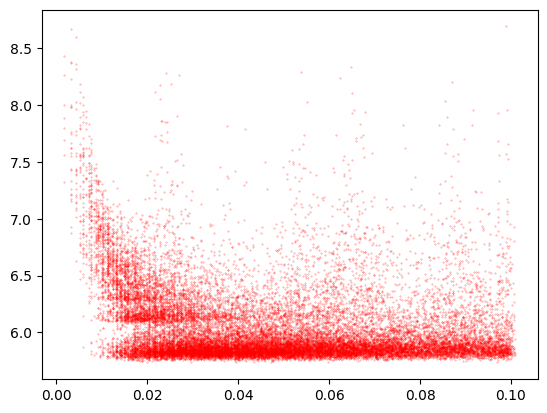

In [110]:
density=h[0]

edge=h[1]

n=100
ra=np.zeros(shape=(n,n,n))
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            ra[i][j][k]=np.sqrt(((edge[0][i]+edge[0][i+1])/2)**2+
            ((edge[1][j]+edge[1][j+1])/2)**2+((edge[2][k]+edge[2][k+1])/2)**2)
fig = plt.figure()
ax=plt.subplot(1,1,1)
#ax.plot(bin_a,np.log10(rho))
ax.scatter(ra,np.log10(density),color='r',s=0.1,alpha=0.5)


/tmp/ipykernel_1547895/3408514198.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.sum(density,axis=2)),cmap='rainbow')


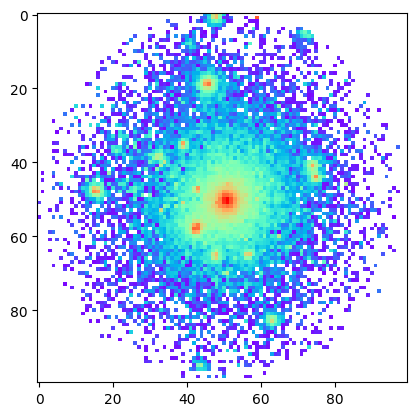

In [111]:
plt.imshow(np.log10(np.sum(density,axis=2)),cmap='rainbow')

In [33]:
hist=np.histogramdd(Coord_g/r,bins=200,range=[[-1,1],[-1,1],[-1,1]],weights=xray_lum)
#img2=np.sum(hist[0],axis=0)
#hist=[]
#img1=np.sum(hist[0],axis=0)
#img_smooth = gaussian_filter(hist[0], sigma=2,mode='constant',truncate=3.0)


NameError: name 'img2' is not defined

201


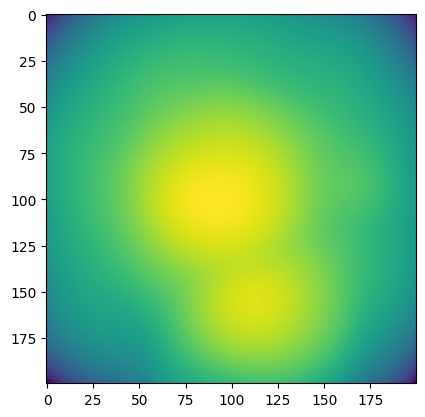

In [15]:
img_smooth = gaussian_filter(hist[0],sigma=10,mode='constant',truncate=3.0)
print(len(hist[1][0]))
img1=np.sum(img_smooth,axis=0)
plt.imshow(np.log10(img1))

/tmp/ipykernel_87157/4114341544.py:20: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(ra,np.log10(density),color='r',s=0.1)


Text(0.5, 1.0, '3D histogram, npixels=200')

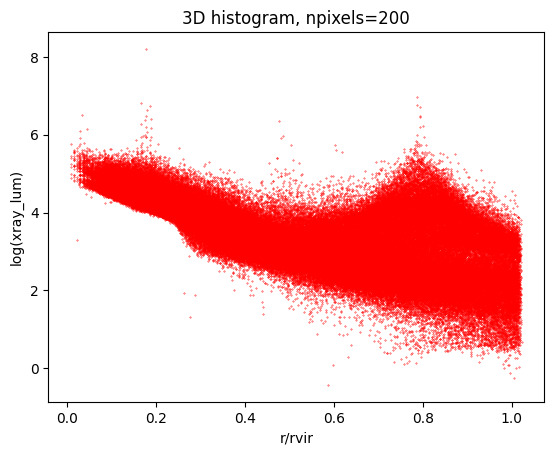

In [34]:
#make scatter plot of xraylum and r with the 3d hist and the smoothed 3d hist
density=hist[0]

edge=hist[1]

n=200
ra=np.zeros(shape=(n,n,n))
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            ra[i][j][k]=np.sqrt(((edge[0][i]+edge[0][i+1])/2)**2+
            ((edge[1][j]+edge[1][j+1])/2)**2+((edge[2][k]+edge[2][k+1])/2)**2)
#density=density[ra<1]

#ra=ra[ra<1]

fig = plt.figure()
ax=plt.subplot(1,1,1)
#ax.plot(bin_a,np.log10(rho))
ax.scatter(ra,np.log10(density),color='r',s=0.1)
ax.set_xlabel('r/rvir')
ax.set_ylabel('log(xray_lum)')
ax.set_title('3D histogram, npixels=200')


[0.0963068]


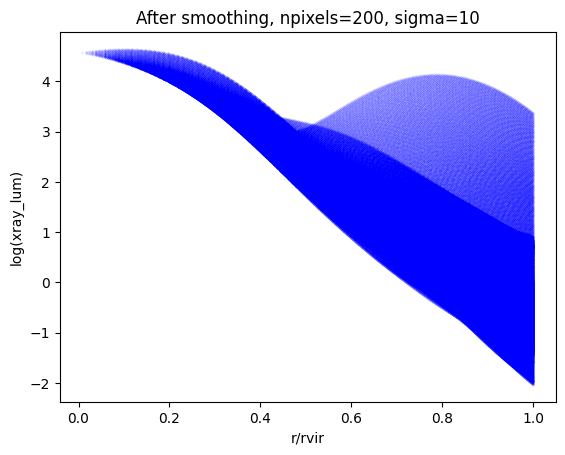

In [46]:
from scipy.ndimage import gaussian_filter
img_smooth = gaussian_filter(density,sigma=10,mode='constant',truncate=3.0)
#img_smooth[img_smooth<10**0]=0
bins=np.arange(0,1,0.05)
bin_a=np.zeros(shape=(len(bins)-1))
rho=np.zeros(shape=(len(bins)-1))
for i in range(0,len(bins)-1):
   mask=(ra>bins[i])*(ra<bins[i+1])
   bin_a[i]=0.5*(bins[i]+bins[i+1])
   rho[i]=np.sum(img_smooth[mask])/bin_a[i]**2
fig = plt.figure()
ax=plt.subplot(1,1,1)
#ax.plot(bin_a,np.log10(rho))
ax.scatter(ra[ra<1],np.log10(img_smooth[ra<1]),color='b',s=0.01,alpha=0.1)
ax.set_xlabel('r/rvir')
ax.set_ylabel('log(xray_lum)')
ax.set_title('After smoothing, npixels=200, sigma=10')
print(ra[img_smooth==np.max(img_smooth)])
#img=np.sum(img_smooth,axis=0)

#plt.imshow(np.log10(img))

"\nbins=np.zeros(len(h[1])-1)\nfor i in range(0,len(h[1])-1):\n    bins[i]=0.5*(h[1][i]+h[1][i+1])\n\nfig = plt.figure()\nax=plt.subplot(1,1,1)\nax.plot(bins,h[0]/bins)\nax.set_yscale('log')\n#ax.set_xscale('log')\n"

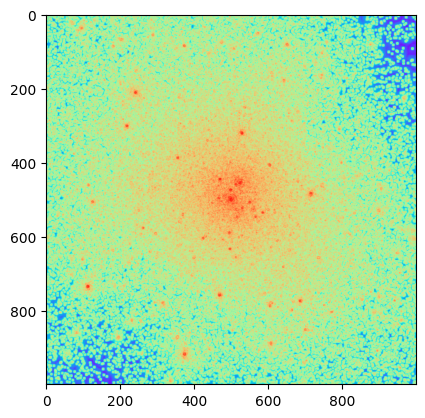

In [52]:
import scipy.ndimage as n
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import h5py
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles_recenter/"
f=h5py.File(path+'66.hdf5','r')
lum=np.array(f['PartType2']['lum_gamaz'])
Coord_s=np.array(f['PartType1']["Coordinates"])
x=Coord_s[:,0]
y=Coord_s[:,1]
z=Coord_s[:,2]
r=np.sqrt(x**2+y**2)/np.max(x)
f.close()
#h= np.histogram(r,bins=100,range=([0,0.1]),density=True)
img=np.histogram2d(x,y,bins=1000,range=([-0.9,0.9],[-0.9,0.9]))[0]

img_smooth = n.gaussian_gradient_magnitude(img, sigma=1,mode='constant',truncate=2.0)
img_smooth += n.gaussian_gradient_magnitude(img, sigma=2,mode='constant',truncate=2.0)
img_smooth += n.gaussian_gradient_magnitude(img, sigma=8,mode='constant',truncate=2.0)
img_smooth += n.gaussian_gradient_magnitude(img, sigma=32,mode='constant',truncate=2.0)
img_smooth += n.gaussian_gradient_magnitude(img, sigma=64,mode='constant',truncate=3.0)

plt.imshow(np.log10(img_smooth),cmap='rainbow')
'''
bins=np.zeros(len(h[1])-1)
for i in range(0,len(h[1])-1):
    bins[i]=0.5*(h[1][i]+h[1][i+1])

fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(bins,h[0]/bins)
ax.set_yscale('log')
#ax.set_xscale('log')
'''

/tmp/ipykernel_1547895/2251467811.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img),cmap='rainbow')


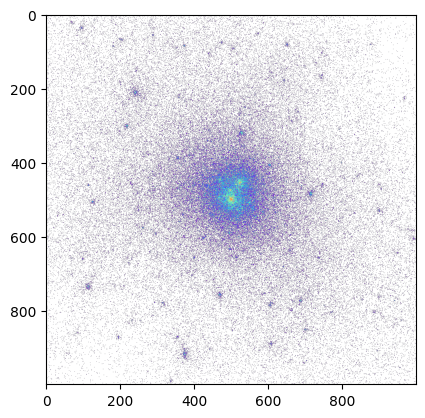

In [53]:
plt.imshow(np.log10(img),cmap='rainbow')